In [105]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
import seaborn as sns
import psutil

## Honey Words Password

In [106]:
list_of_honey_words = []
with open('data/honeywords_10000.txt', 'r') as f:
    list_of_honey_words = f.readlines()

for i in range(0, len(list_of_honey_words)):
    list_of_honey_words[i] = list_of_honey_words[i].split('\n')[0]


### List of accounts with honey passwords created

In [107]:
list_of_accounts = []
with open('data/username_password_honey.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.split('\t')
        list_of_accounts.append(line)
list_of_accounts[:5]

[['1',
  'ipsit',
  'paredes,trance,glorioso,Dragon,fluturas,philip,chiquita,ilovegod,larry,lilwayne1,trustme,sadad,maemae,vauxhall,princeton,lol123,luckystar,reece,catalina,spongebob,horselover\n']]

## Register user account with honey passord set

In [108]:
# Registration phase for a user
index_of_new_account = len(list_of_accounts) + 1

def put_account_honey(index, username, passwords, index_actual):
    
    print(type(passwords.tolist()))
    new_entry_pwd = str(index) + "\t" + str(username) + "\t" + ",".join(passwords)
    new_entry_index = str(index) + "\t" + str(username) + "\t" + str(index_actual)
    
    print(new_entry_pwd)
    print(new_entry_index)
    
    with open('data/username_password_honey.txt', 'w') as f:
        f.write(new_entry_pwd + "\n")
        f.close()
        
    with open('data/username_index_honey.txt', 'w') as f:
        f.write(new_entry_index)
        f.close()
    

def register_user(index, user_name, password):
    # Check user exists:
    user_index = -1
    for i in range(0, len(list_of_accounts)):
        user = list_of_accounts[i][1]
        if(user == user_name):
            user_index = i
    print(user_index)
    
    if user_index == -1:
        honey_values = np.random.choice(list_of_honey_words, 20).tolist()
        print('Honey Words:', honey_values)

        honey_values.append(password)

        np.random.shuffle(honey_values)

        index_of_password = honey_values.index(password)

        print('Index of password: ', 
              index_of_password)

        # Store username and password list to a db
        # Store username and index in another db
        put_account(index, user_name, possible_passwords, index_of_password[0][0])
    else:
        print('User', user_name, 'exists', 'Try login')
    
register_user(index_of_new_account, 'ipsit', 'sadad')

0
User ipsit exists Try login


In [109]:
def login_user_honey(username, password):
    
    accounts_with_honeywords = []
    accounts_with_index = []
    status = -1
    with open('data/username_password_honey.txt', 'r') as f:
        lines = f.readlines()
        for line in lines:
            line = line.split('\t')
            accounts_with_honeywords.append(line)
    
    with open('data/username_index_honey.txt', 'r') as f:
        lines = f.readlines()
        for line in lines:
            line = line.split('\t')
            accounts_with_index.append(line)
        
    # Does user exist
    for account in zip(accounts_with_honeywords, accounts_with_index):
        if(account[0][1] == username):
            # print('Username exists')
            
            password_index = int(account[1][2])
            honey_word_set = account[0][2].split(',')
            
            if honey_word_set[password_index] == password:
                status = 0
                # print('Login Successful')
            elif password in honey_word_set:
                status = 1
                # print('Found Honeyword password')
            else:
                status = 2
    return status
        
login_user_honey('ipsit', 'pass')

2

### Attempt 100 logins and see number of iterations till honey word is found

In [110]:
iteration_list = []

cpu_usage_honey = psutil.cpu_percent(4)
for j in range(0, 100):
    print("Attempt", j + 1)
    for i in range(0, 2000):
        random_word = np.random.choice(list_of_honey_words)

        status = login_user_honey('ipsit', random_word)

        if status == 1:
            # print('Honey word. locking account!!')
            
            cpu_usage_honey = max(psutil.cpu_percent(4), cpu_usage_honey)
            break
    iteration_list.append(i + 1)

Attempt 1
Attempt 2
Attempt 3
Attempt 4
Attempt 5
Attempt 6
Attempt 7
Attempt 8
Attempt 9
Attempt 10
Attempt 11
Attempt 12
Attempt 13
Attempt 14
Attempt 15
Attempt 16
Attempt 17
Attempt 18
Attempt 19
Attempt 20
Attempt 21
Attempt 22
Attempt 23
Attempt 24
Attempt 25
Attempt 26
Attempt 27
Attempt 28
Attempt 29
Attempt 30
Attempt 31
Attempt 32
Attempt 33
Attempt 34
Attempt 35
Attempt 36
Attempt 37
Attempt 38
Attempt 39
Attempt 40
Attempt 41
Attempt 42
Attempt 43
Attempt 44
Attempt 45
Attempt 46
Attempt 47
Attempt 48
Attempt 49
Attempt 50
Attempt 51
Attempt 52
Attempt 53
Attempt 54
Attempt 55
Attempt 56
Attempt 57
Attempt 58
Attempt 59
Attempt 60
Attempt 61
Attempt 62
Attempt 63
Attempt 64
Attempt 65
Attempt 66
Attempt 67
Attempt 68
Attempt 69
Attempt 70
Attempt 71
Attempt 72
Attempt 73
Attempt 74
Attempt 75
Attempt 76
Attempt 77
Attempt 78
Attempt 79
Attempt 80
Attempt 81
Attempt 82
Attempt 83
Attempt 84
Attempt 85
Attempt 86
Attempt 87
Attempt 88
Attempt 89
Attempt 90
Attempt 91
Attempt 

In [119]:
cpu_usage_honey = 18.7

## Normal password based login with rate limiter

In [112]:
# 3 attempts to login. If you fail, your account and data gets locked
rate_limit = 3

list_of_accounts = []

status = -1

with open('./data/username_password_normal.txt', 'r') as f:
    accounts = f.readlines()
    for account in accounts:
        list_of_accounts.append(account.split('\t'))

def put_account_normal(index, username, password):
    new_entry_pwd = str(index) + "\t" + str(username) + "\t" + password
    with open('./data/username_password_normal.txt', 'w') as f:
        f.write(new_entry_pwd)

def register_user_normal(username, password):
    for account in list_of_accounts:
        if(account[1] == username):
            print("Account exists")
            return
    put_account_normal(len(list_of_accounts) + 1, username, password)

register_user_normal('ipsit', 'asu_work')

def login_user_normal(username, password, count):
    if count < rate_limit:
        for account in list_of_accounts:
            # print(account)
            if account[1] == username:
                # print('Found Username')
                count += 1
                if account[2] == password:
                    status = 0
                    return status, count
                else:
                    status = 1
                    return status, count
    return status, count


login_user_normal('ipsit', 'pass', 0)

Account exists


(1, 1)

### Attempt 100 logins with different passwords with rate limiter approach

In [113]:
iteration_list_normal = []

cpu_usage_normal = psutil.cpu_percent(4)
for j in range(0, 100):
    count = 0
    print("Attempt", j + 1)
    for i in range(0, 2000):
        random_word = np.random.choice(list_of_honey_words)

        status, count = login_user_normal('ipsit', random_word, count)

        if status == 1 and count >= rate_limit:
            # print('Login failed!!', "Limit: ", count)
            cpu_usage_normal = max(psutil.cpu_percent(4), cpu_usage_normal)
            break
    iteration_list_normal.append(count)

Attempt 1
Attempt 2
Attempt 3
Attempt 4
Attempt 5
Attempt 6
Attempt 7
Attempt 8
Attempt 9
Attempt 10
Attempt 11
Attempt 12
Attempt 13
Attempt 14
Attempt 15
Attempt 16
Attempt 17
Attempt 18
Attempt 19
Attempt 20
Attempt 21
Attempt 22
Attempt 23
Attempt 24
Attempt 25
Attempt 26
Attempt 27
Attempt 28
Attempt 29
Attempt 30
Attempt 31
Attempt 32
Attempt 33
Attempt 34
Attempt 35
Attempt 36
Attempt 37
Attempt 38
Attempt 39
Attempt 40
Attempt 41
Attempt 42
Attempt 43
Attempt 44
Attempt 45
Attempt 46
Attempt 47
Attempt 48
Attempt 49
Attempt 50
Attempt 51
Attempt 52
Attempt 53
Attempt 54
Attempt 55
Attempt 56
Attempt 57
Attempt 58
Attempt 59
Attempt 60
Attempt 61
Attempt 62
Attempt 63
Attempt 64
Attempt 65
Attempt 66
Attempt 67
Attempt 68
Attempt 69
Attempt 70
Attempt 71
Attempt 72
Attempt 73
Attempt 74
Attempt 75
Attempt 76
Attempt 77
Attempt 78
Attempt 79
Attempt 80
Attempt 81
Attempt 82
Attempt 83
Attempt 84
Attempt 85
Attempt 86
Attempt 87
Attempt 88
Attempt 89
Attempt 90
Attempt 91
Attempt 

In [114]:
cpu_usage_normal

4.0

In [115]:
len(iteration_list_normal)

100

### No. of computations required in Honeyword v/s Rate-Limiter with attempts limited to 3

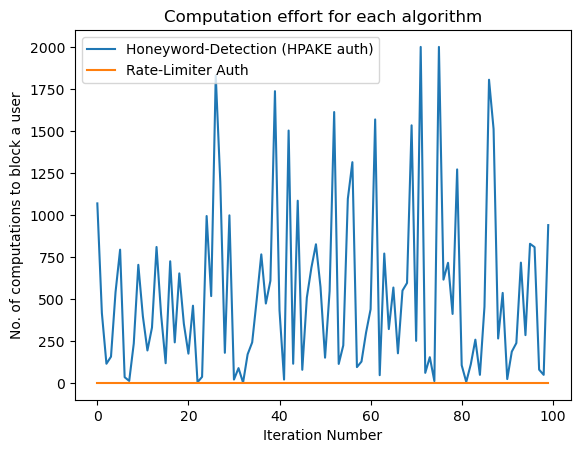

In [118]:
# plt.bar(height=iteration_list, x=range(0, 100))
plt.plot(iteration_list)
plt.plot(iteration_list_normal)
# plt.bar(height=iteration_list_normal, x=range(0, 100))
plt.title('Computation effort for each algorithm')
plt.xlabel('Iteration Number')
plt.ylabel('No. of computations to block a user')
plt.legend(['Honeyword-Detection (HPAKE auth)', 'Rate-Limiter Auth'])
plt.show()

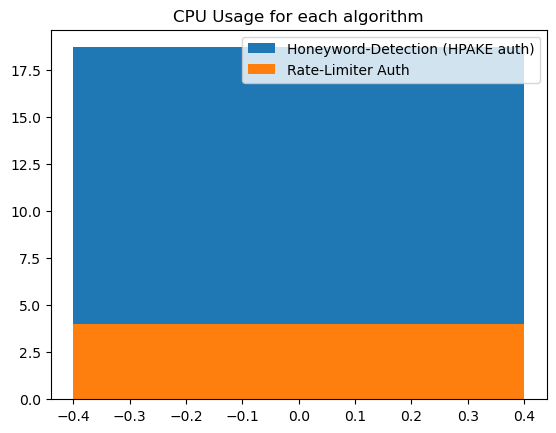

In [122]:
# plt.bar(height=iteration_list, x=range(0, 100))
plt.bar(height=cpu_usage_honey, x=range(0,1))
plt.bar(height=cpu_usage_normal, x=range(0,1))
# plt.bar(height=iteration_list_normal, x=range(0, 100))
plt.title('CPU Usage for each algorithm')
plt.legend(['Honeyword-Detection (HPAKE auth)', 'Rate-Limiter Auth'])
plt.show()